# 2

reads_1 -> из первой задачи 7 семинара

reads_6 -> из задачи которую разбирали на 6 лекции (начиная с 21 слайда), там по условию задачи нужно еще поставить k = 3

In [153]:
import numpy as np
import networkx as nx

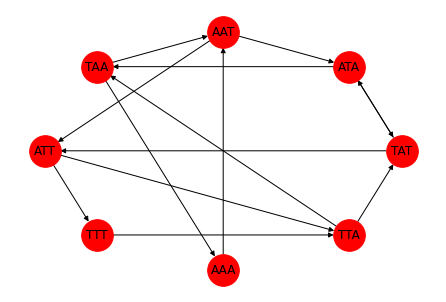

In [229]:
G = nx.DiGraph()
reads_1 = 'TATA, ATAT, AATA, ATAA, AATT, ATTT, AAAT, TATT, ATTA, TTTA, TAAA, TTAT, TTAA, TAAT'.split(', ')
reads_6 = 'CGTGCAA, ATGGCGT, CAATGGC, GGCGTGC, TGCAATG'.split(', ')
k_mers = []
k = 4

k_mers = [i[j:j + k] for i in reads_1 for j in range(len(i) - k + 1)]

G.add_edges_from([(i[:-1], i[1:]) for i in k_mers])

nx.draw(G, pos = nx.circular_layout(G), with_labels = True, 
        node_color = 'r', node_size = 1000)

In [228]:
s = ''
for i in nx.eulerian_circuit(G):
  s += i[1][-1]
print(s, len(s))

TTAAATAATTATAT 14


# 3

Топ 10 Транскрипционных факторов по числу мишеней

In [56]:
from google.colab import files
files.upload()

Saving TF_gene.graphml to TF_gene.graphml


{'TF_gene.graphml': b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="directed"><node id="AATF"/>\n<node id="BAX"/>\n<node id="CDKN1A"/>\n<node id="KLK3"/>\n<node id="MYC"/>\n<node id="TP53"/>\n<node id="ABL1"/>\n<node id="BCL2"/>\n<node id="BCL6"/>\n<node id="CCND2"/>\n<node id="CSF1"/>\n<node id="FOXO3"/>\n<node id="JUN"/>\n<node id="PIM1"/>\n<node id="AES"/>\n<node id="EPHA3"/>\n<node id="LEF1"/>\n<node id="RND3"/>\n<node id="AHR"/>\n<node id="ABCG2"/>\n<node id="AHRR"/>\n<node id="ARNT"/>\n<node id="BRCA1"/>\n<node id="CA9"/>\n<node id="CCND1"/>\n<node id="CCNG2"/>\n<node id="CYP1A1"/>\n<node id="CYP1A2"/>\n<node id="CYP1B1"/>\n<node id="CYP2B6"/>\n<node id="FOS"/>\n<node id="IL13"/>\n<node id="IL1B"/>\n<node id="IL6"/>\n<node id="MFSD2A"/>\n<node 

In [215]:
H = nx.read_graphml('TF_gene.graphml')
a = sorted([i for i in H.out_degree()], key = lambda x: x[1], reverse = True)
for i in a[:10]:
  print(i)

('SP1', 472)
('NFKB1', 303)
('RELA', 301)
('TP53', 164)
('JUN', 149)
('STAT3', 142)
('E2F1', 134)
('SP3', 113)
('MYC', 100)
('AR', 93)


# 4

Два транскрипционных фактора, которые имеют наибольшее число общих мишеней

In [220]:
H = nx.read_graphml('TF_gene.graphml')
a = sorted([i for i in H.out_degree()], key = lambda x: x[1], reverse = True)
for i in a[:10]:
  print(i)
 
b = {}
for i in H.edges():
  if i[0] not in b:
    b[i[0]] = []
  b[i[0]].append(i[1])

name = [i[0] for i in a[:10]]

max1 = len(set(b[name[0]]) & set(b[name[1]]))
for i in range(len(name)):
  for j in range(i + 1, len(name)):
    x = len(set(b[name[i]]) & set(b[name[j]]))
    if x > max1:
      max1 = x
      TF1 = name[i]
      TF2 = name[j]
print()
print(max1, TF1, TF2)

('SP1', 472)
('NFKB1', 303)
('RELA', 301)
('TP53', 164)
('JUN', 149)
('STAT3', 142)
('E2F1', 134)
('SP3', 113)
('MYC', 100)
('AR', 93)

281 NFKB1 RELA


# 5


Есть ли путь в лабиринте? Лабиринт задается прямоугольной матрицей 0 - стена, 1 - проход

In [221]:
a = [[1, 1, 0, 1],
     [0, 1, 0, 0],
     [1, 1, 1, 1],
     [1, 0, 0, 0],
     [1, 1, 0, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 1]
]
G = nx.Graph()

n, m = len(a), len(a[0])
print(f'matrix_size: {n}x{m}')

for i in range(n):
  for j in range(m):
    if a[i][j] != 0:
      if j < m - 1 and a[i][j + 1] == 1:
        G.add_edge(f'{i},{j}', f'{i},{j + 1}')
      if i < n - 1 and a[i + 1][j] == 1:
        G.add_edge(f'{i},{j}', f'{i + 1},{j}')

print('Graph has path?')
if '0,0' not in G.nodes() or f'{n - 1},{m - 1}' not in G.nodes():
  print('no')
else: 
  ans = 'yes' if nx.has_path(G, f'0,0', f'{n - 1},{m - 1}') else 'no'
  print(ans)

matrix_size: 7x4
Graph has path?
yes
